In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score



In [2]:
df = pd.read_csv('../../dataset/weatherClean.csv')

In [3]:
df.describe()


,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.221213,12.186400,2.349974,5.302343,7.377594,9.433756,39.984292,8.202239,9.092649,14.001988,18.637576,68.843810,51.482606,1017.653758,4.389750,4.258511,0.221213,0.224181,6.402544
std,0.064960,6.388924,8.423217,4.147637,3.898898,5.188836,13.138385,5.515461,5.107987,8.851082,8.721551,18.932077,20.532065,6.746248,2.879055,2.745819,0.415065,0.417043,3.426506
min,0.067224,-8.500000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,980.500000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.185234,7.600000,0.000000,2.400000,4.400000,5.000000,31.000000,3.000000,5.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,0.222714,12.000000,0.000000,4.400000,8.100000,9.000000,39.000000,8.000000,8.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,5.000000,5.000000,0.000000,0.000000,6.000000
75%,0.266917,16.800000,0.800000,7.200000,10.500000,15.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,7.000000,7.000000,0.000000,0.000000,9.000000
max,0.363151,33.900000,371.000000,145.000000,14.500000,18.000000,135.000000,18.000000,18.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,9.000000,9.000000,1.000000,1.000000,12.000000


In [4]:
X = df.drop('RainTomorrow', axis=1)
Y = df['RainTomorrow']
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
#X = X_test
#Y = y_test


Normalizacija

In [5]:
scaler = MinMaxScaler()
feature_names = X.columns
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Month
0,0.309164,0.629717,0.000000,0.068966,0.000000,0.000000,0.325581,0.000000,1.000000,0.200000,0.252874,0.170000,0.090000,0.614112,0.000000,0.777778,0.0,0.181818
1,0.000000,0.792453,0.000000,0.080000,0.000000,0.352941,0.271318,0.235294,0.352941,0.184615,0.068966,0.140000,0.090000,0.533884,0.000000,0.777778,0.0,0.000000
2,0.023888,0.698113,0.000000,0.102069,0.000000,0.647059,0.496124,0.941176,0.941176,0.200000,0.218391,0.130000,0.090000,0.485950,0.000000,0.777778,0.0,0.909091
3,0.000000,0.674528,0.000000,0.071724,0.000000,0.058824,0.356589,0.058824,0.882353,0.146154,0.321839,0.210000,0.090000,0.363636,0.000000,0.777778,0.0,0.090909
4,0.641075,0.412736,0.000000,0.091034,0.000000,0.882353,0.643411,0.000000,0.941176,0.230769,0.471264,0.330000,0.130000,0.423140,0.000000,0.777778,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,1.000000,0.363208,0.000539,0.045517,0.986207,0.235294,0.209302,0.176471,0.176471,0.115385,0.218391,0.630000,0.530000,0.634711,0.111111,0.000000,0.0,0.000000
142189,0.434720,0.483491,0.000000,0.055172,0.986207,0.352941,0.271318,0.352941,0.294118,0.146154,0.195402,0.520000,0.100000,0.619835,0.333333,0.222222,0.0,1.000000
142190,0.139189,0.502358,0.000000,0.082759,1.000000,0.352941,0.240310,0.411765,0.352941,0.115385,0.229885,0.450000,0.170000,0.714050,0.000000,0.000000,0.0,1.000000
142191,0.309164,0.457547,0.002695,0.036568,0.508800,0.823529,0.263444,0.647059,0.352941,0.169231,0.214225,0.688438,0.514826,0.614112,0.487750,0.473168,0.0,0.545455


Vizuelizacija

In [6]:
def find_boundaries(df, name):
    
    Q1=df[name].quantile(0.25)
    Q3=df[name].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    return lower_boundary, upper_boundary



In [7]:
def outliers(name,df):
    lower_rainfall, upper_rainfall = find_boundaries(df, name)
    print('Gornja granica', upper_rainfall)
    print('Donja granica', lower_rainfall)
    outliers_rainfall = np.where(df[name] > upper_rainfall, True,
                            np.where(df[name] < lower_rainfall, True, False))

    print(outliers_rainfall)
    return len(df[outliers_rainfall]), outliers_rainfall



In [8]:
l, out = outliers('Evaporation',X)
X = X[~(out)]
Y = Y[~(out)]
print(len(df))

l, out = outliers('WindSpeed9am',X)
X = X[~(out)]
Y = Y[~(out)]
print(len(df))

Gornja granica 0.09931034482758619
Donja granica -0.03310344827586206
[False False  True ... False False False]
142193
Gornja granica 0.2846153846153846
Donja granica -0.08461538461538462
[False False False ... False False False]
142193


In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


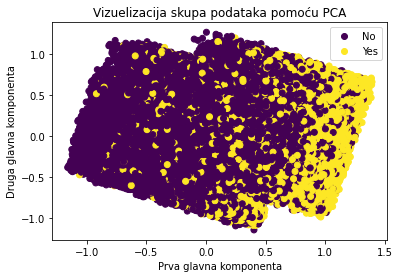

In [10]:
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],c=Y)
plt.xlabel('Prva glavna komponenta')
plt.ylabel('Druga glavna komponenta')
plt.title('Vizuelizacija skupa podataka pomoću PCA')
plt.legend(handles=scatter.legend_elements()[0], labels=['No', 'Yes'])

plt.show()

In [11]:
ks = range(2, 6)
for k in ks:
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    silhouette_values = silhouette_score(X, kmeans.labels_)
    print('Silueta za k = {}: {}'.format(k,silhouette_values))
    print(kmeans.inertia_)

Silueta za k = 2: 0.24687908466343034
109109.86293296806
Silueta za k = 3: 0.19006931059586993
92295.79663243913
Silueta za k = 4: 0.17167638348422518
84704.35636563983
Silueta za k = 5: 0.15289598078250166
80340.67338663765


In [12]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.iloc[1]

0     0.450762
1     0.465294
2     0.000313
3     0.041449
4     0.736371
5     0.426121
6     0.255400
7     0.339714
8     0.418759
9     0.105679
10    0.213538
11    0.560112
12    0.373101
13    0.636782
14    0.214671
15    0.215091
16    0.009295
17    0.797875
Name: 1, dtype: float64

Silueta za k = 2: 0.3895718325375206
34279.129585672345
Silueta za k = 3: 0.36374330414113026
23876.434414715313
Silueta za k = 4: 0.3618801839102172
17815.63234885665
Silueta za k = 5: 0.34799985233825453
14693.85579499271
Silueta za k = 6: 0.35308227694840527
12263.889009083947
Silueta za k = 7: 0.3334057990401657
10691.476151700219
Silueta za k = 8: 0.3416051653533954
9352.863422450855
Silueta za k = 9: 0.3437863619587852
8218.955382650589


Text(0.5, 1.0, 'Silhouette coefs')

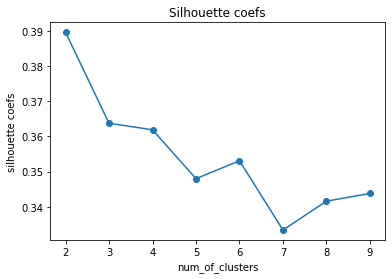

In [13]:
ks = range(2, 10)
silhouette = []
for k in ks:
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_pca)
    silhouette_values = silhouette_score(X_pca, kmeans.labels_)
    silhouette.append(silhouette_values)
    print('Silueta za k = {}: {}'.format(k,silhouette_values))
    print(kmeans.inertia_)
plt.plot(ks, silhouette, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

In [14]:
kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=2)

In [15]:
centers = pd.DataFrame(kmeans.cluster_centers_)
np.unique(kmeans.labels_)

array([0, 1], dtype=int32)

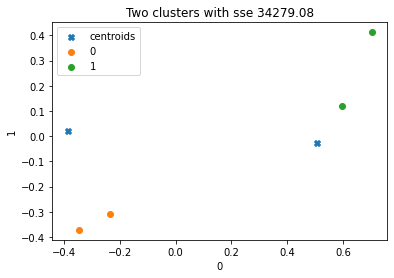

In [16]:
plt.scatter(centers[0], centers[1], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X_pca[kmeans.labels_ == c]
    plt.scatter(elems[0], elems[1], label=c)

plt.xlabel('0')
plt.ylabel('1')
plt.title('Two clusters with sse {}'.format(round(kmeans.inertia_, 2)))
plt.legend()
plt.show()

In [17]:
X_restored = pca.inverse_transform(centers)
X_restored = scaler.inverse_transform(X_restored)

In [18]:
new_df = pd.DataFrame(X_restored)
new_df.columns = X.columns

In [19]:
new_df

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Month
0,0.206618,11.943784,-0.051177,5.665589,9.563419,8.834524,38.435369,7.399272,8.691390,13.233308,18.057635,61.581822,41.305482,1018.572476,2.873369,2.815034,0.009235,6.453300
1,0.243396,12.131594,5.423504,3.891906,4.415577,10.267865,40.840776,9.338032,9.628776,13.964018,18.857310,79.784265,65.949613,1016.789160,6.438300,6.184920,0.501210,6.367283


In [20]:
len(kmeans.labels_)

136792

In [21]:
silhouette_values = silhouette_score(X_pca, kmeans.labels_)
silhouette_values

0.3894634861139525